In [4]:
import numpy as np
from OpenEphys import loadContinuous
import os

In [5]:
import glob

In [6]:
files_to_be_converted = ['Pre 1','Pre 2','Pre 3','Cit 1','Cit 2','Cit 3','Way 1', 'Way 2','Way 3']
source_folder = r'/Users/sharplab/tran/EEG data'

path = "/".join([source_folder,files_to_be_converted[0]])
os.chdir(path)
file = glob.glob("*.continuous")
print(file[0])
eegdata = loadContinuous(file[0], dtype=float)

100_CH43.continuous
Loading continuous data...


In [7]:
import pprint


pprint.pprint(eegdata)

{'data': array([166.53 , 384.345, -11.895, ...,   0.   ,   0.   ,   0.   ]),
 'header': {' date_created': "'1-May-2018 155919'",
            ' header_bytes': '1024',
            ' version': '0.4',
            'bitVolts': '0.195',
            'blockLength': '1024',
            'bufferSize': '1024',
            'channel': "'CH43'",
            'channelType': "'Continuous'",
            'description': "'each record contains one 64-bit timestamp, one "
                           '16-bit sample count (N), 1 uint16 recordingNumber, '
                           'N 16-bit samples, and one 10-byte record marker (0 '
                           "1 2 3 4 5 6 7 8 255)'",
            'format': "'Open Ephys Data Format'",
            'sampleRate': '30000'},
 'recordingNumber': array([0., 0., 0., ..., 0., 0., 0.]),
 'timestamps': array([1.34123520e+07, 1.34133760e+07, 1.34144000e+07, ...,
       1.22752000e+08, 1.22753024e+08, 1.22754048e+08])}


In [8]:
array = eegdata['data']
samplerate = eegdata['header']['sampleRate']
print(array)


[166.53  384.345 -11.895 ...   0.      0.      0.   ]


In [41]:
duration = np.shape(array)[0]/30000
#if the freq is 250Hz, the number of sample needs to be:
newarrayshape = np.real(int(round(256*duration)))




In [10]:
from scipy import signal as ss
from scipy import stats as st

In [42]:
#filtering the data (array)
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(low_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_low_cutoff = low_cutoff / nyq
    b_low, a_low = butter(order, normal_low_cutoff, btype='low', analog=False)
    return b_low, a_low

def butter_highpass(high_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_high_cutoff = high_cutoff / nyq
    b_high, a_high = butter(order, normal_high_cutoff, btype='high', analog=False)
    return b_high, a_high

def butter_lowpass_filter(data, low_cutoff, fs, order=5):
    b_low, a_low = butter_lowpass(low_cutoff, fs, order=order)
    y_low = lfilter(b_low, a_low, data)
    return y_low

def butter_highpass_filter(data, high_cutoff, fs, order=5):
    b_high, a_high = butter_lowpass(high_cutoff, fs, order=order)
    y_high = lfilter(b_high, a_high, data)
    return y_high

# Filter requirements.
order = 5
fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1


# Filter the data, and plot both the original and filtered signals.
filtered_array = butter_lowpass_filter(array, low_cutoff, fs, order)


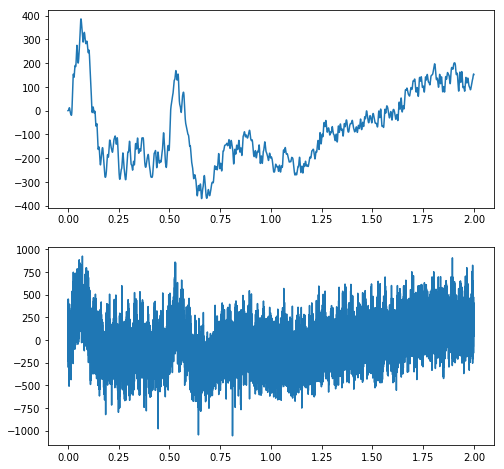

In [43]:
f, a = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
t = np.arange(60000)/30000.0
a[0].plot(t, filtered_array[:60000])
a[1].plot(t, array[:60000])
plt.show()

In [44]:
#downsampling the data array
newarray=ss.resample(filtered_array, newarrayshape)


In [64]:
print(newarray[0])

-0.38617209745535996


In [51]:
decimate_factor=np.shape(filtered_array)[0]/newarrayshape
print((decimate_factor)/10)


11.718748459366942


In [62]:
#decimated_array=filtered_array
#for decimate_round in np.arange(10):
    #decimated_array=ss.decimate(decimated_array, (decimate_factor)/10)

In [59]:
np.shape(filtered_array)[0]/np.shape(newarray)[0]

117.18748459366942

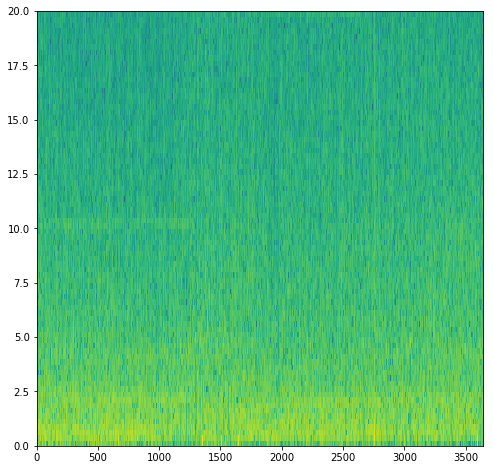

In [80]:
from matplotlib import pyplot as plt
f, a = plt.subplots(figsize=(8,8))

a.specgram(newarray, 1000, 250)

a.set_ylim([0,20])
plt.show()

In [90]:
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [91]:
'''
global variables
'''
sampling_rate = 250
num_samples = np.shape(newarray)[0]
eeg_signal = newarray

In [105]:
'''
compute spectrogram
'''

frequencies, t, Sxx = signal.spectrogram(eeg_signal, sampling_rate)

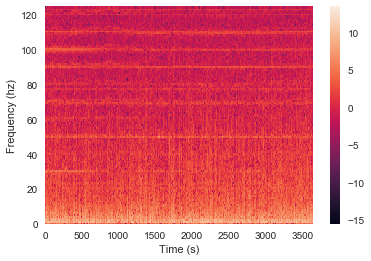

In [106]:
plt.pcolormesh(t, frequencies, np.log(Sxx))
plt.ylabel('Frequency (hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

In [107]:
Sxx

array([[2.68293066e+02, 3.15476037e+01, 7.19789218e+01, ...,
        9.22066495e+01, 3.32540882e+01, 6.02576445e+01],
       [1.48058064e+03, 1.16415350e+04, 1.82771352e+04, ...,
        7.62195038e+03, 4.18766666e+03, 9.51153397e+03],
       [4.05706056e+03, 2.60967906e+03, 3.28158789e+03, ...,
        4.06481610e+03, 1.67590373e+03, 9.73289264e+02],
       ...,
       [2.08970347e+00, 4.75337103e-01, 2.18084561e+00, ...,
        8.12614826e-01, 3.20043394e+00, 2.99374370e+00],
       [7.08027533e-01, 3.36705516e-01, 2.71174619e-03, ...,
        5.63712252e-01, 3.63776675e-01, 4.13739313e-01],
       [2.29939635e-02, 2.62749194e-02, 5.17991296e-02, ...,
        8.42581871e-01, 2.44885472e-01, 5.72334371e-01]])

In [111]:
Sxx.shape

(129, 4067)

In [112]:
frequencies = np.linspace(0.5, 125, 129)

In [114]:
import pandas as pd

In [115]:
df= pd.DataFrame(data=Sxx, columns=t, index=frequencies)

In [117]:
df.index.name ='frequencies'

In [120]:
df.head()

,0.512,1.408,2.304,3.2,4.096,4.992,5.888,6.784,7.68,8.576,...,3635.584,3636.48,3637.376,3638.272,3639.168,3640.064,3640.96,3641.856,3642.752,3643.648
frequencies,,,,,,,,,,,,,,,,,,,,,
0.500000,268.293066,31.547604,71.978922,225.143163,16.448342,73.800882,2.479320,280.062192,556.817048,0.071108,...,187.277837,75.178529,12.742586,253.101832,463.261667,296.272818,3.893463,92.206650,33.254088,60.257645
1.472656,1480.580645,11641.534984,18277.135156,47464.542504,6293.876466,976.805942,117.669585,12565.014860,2835.842251,211.270430,...,7384.841988,3422.111222,739.143888,24194.810759,12095.944756,29798.093669,2386.946444,7621.950379,4187.666657,9511.533972
2.445312,4057.060557,2609.679063,3281.587886,5092.437997,2162.773939,2263.702580,7127.988063,1074.221116,4235.694591,13044.255713,...,905.362209,8240.451250,1541.573894,1953.664549,2907.320832,4661.005928,2305.414162,4064.816099,1675.903725,973.289264
3.417969,2839.674728,36.296849,202.134681,427.551958,261.859313,655.020456,4721.269692,1224.471760,1936.241554,2855.375687,...,2113.130716,121.398388,91.262514,1316.791742,3520.220567,2863.200349,1502.802912,1336.271142,923.801371,2231.590595
4.390625,3911.026070,139.628539,97.781903,5406.521045,247.760775,102.715741,2900.540225,897.433176,1526.920949,1147.008686,...,3932.578130,404.379062,342.757549,403.903004,1185.881204,350.409567,1558.061940,3801.833449,568.304489,464.544560


In [122]:
df.apply(np.mean, axis=1)

frequencies
0.500000       179.072652
1.472656      9868.041782
2.445312      4877.836429
3.417969      1707.178512
4.390625      1079.477407
5.363281       650.941789
6.335938       410.944560
7.308594       275.436157
8.281250       201.904107
9.253906       151.399577
10.226562      129.683613
11.199219       87.875230
12.171875       66.869665
13.144531       53.584687
14.117188       44.837122
15.089844       36.439698
16.062500       32.728996
17.035156       28.676058
18.007812       25.135756
18.980469       23.967766
19.953125       24.705213
20.925781       25.234508
21.898438       18.104322
22.871094       20.594495
23.843750       20.747596
24.816406       15.197800
25.789062       13.269621
26.761719       12.360711
27.734375       11.730816
28.707031       11.902391
                 ...     
96.792969        0.532344
97.765625        0.581589
98.738281        1.006551
99.710938        7.068027
100.683594       7.867676
101.656250       1.342854
102.628906       0.687112


In [123]:
import pandas as pd
sampling_rate = 250
def compute_mean_power_per_frequency(downsampled_array, sampling_rate):
    num_samples = np.shape(downsampled_array)[0]
    frequencies, time, Sxx = signal.spectrogram(downsampled_array, sampling_rate)
    df= pd.DataFrame(data=Sxx, columns=time, index=frequencies)
    return df.apply(np.mean, axis=1).values

In [127]:
print(compute_mean_power_per_frequency(newarray, 250))

[1.79072652e+02 9.86804178e+03 4.87783643e+03 1.70717851e+03
 1.07947741e+03 6.50941789e+02 4.10944560e+02 2.75436157e+02
 2.01904107e+02 1.51399577e+02 1.29683613e+02 8.78752298e+01
 6.68696653e+01 5.35846870e+01 4.48371216e+01 3.64396984e+01
 3.27289962e+01 2.86760583e+01 2.51357557e+01 2.39677661e+01
 2.47052129e+01 2.52345084e+01 1.81043221e+01 2.05944951e+01
 2.07475956e+01 1.51978000e+01 1.32696206e+01 1.23607106e+01
 1.17308161e+01 1.19023909e+01 1.54462814e+01 2.97834381e+01
 1.12392825e+01 8.92239254e+00 8.44765542e+00 7.87032768e+00
 7.63722529e+00 7.26251854e+00 7.09172115e+00 6.69007177e+00
 7.11657179e+00 8.84172109e+00 7.32247808e+00 5.61486763e+00
 5.21684804e+00 4.98812097e+00 4.85790433e+00 4.62732435e+00
 4.46626525e+00 4.25904353e+00 4.28562112e+00 3.49793478e+01
 9.07821039e+00 4.64658413e+00 3.55678023e+00 3.27364332e+00
 2.81492034e+00 2.70266417e+00 2.51904325e+00 2.38561477e+00
 2.35872928e+00 2.67234005e+00 3.19353183e+00 2.45600240e+00
 1.93602900e+00 1.787825

In [63]:
print(newarray)

[-0.3861721   5.26464842 10.12438249 ... -1.16497819 -1.04903205
  0.93400174]


In [130]:
df= pd.DataFrame(data=Sxx, columns=t, index=frequencies)
df.index.name ='frequencies'
df.head()

,0.512,1.408,2.304,3.2,4.096,4.992,5.888,6.784,7.68,8.576,...,3635.584,3636.48,3637.376,3638.272,3639.168,3640.064,3640.96,3641.856,3642.752,3643.648
frequencies,,,,,,,,,,,,,,,,,,,,,
0.500000,268.293066,31.547604,71.978922,225.143163,16.448342,73.800882,2.479320,280.062192,556.817048,0.071108,...,187.277837,75.178529,12.742586,253.101832,463.261667,296.272818,3.893463,92.206650,33.254088,60.257645
1.472656,1480.580645,11641.534984,18277.135156,47464.542504,6293.876466,976.805942,117.669585,12565.014860,2835.842251,211.270430,...,7384.841988,3422.111222,739.143888,24194.810759,12095.944756,29798.093669,2386.946444,7621.950379,4187.666657,9511.533972
2.445312,4057.060557,2609.679063,3281.587886,5092.437997,2162.773939,2263.702580,7127.988063,1074.221116,4235.694591,13044.255713,...,905.362209,8240.451250,1541.573894,1953.664549,2907.320832,4661.005928,2305.414162,4064.816099,1675.903725,973.289264
3.417969,2839.674728,36.296849,202.134681,427.551958,261.859313,655.020456,4721.269692,1224.471760,1936.241554,2855.375687,...,2113.130716,121.398388,91.262514,1316.791742,3520.220567,2863.200349,1502.802912,1336.271142,923.801371,2231.590595
4.390625,3911.026070,139.628539,97.781903,5406.521045,247.760775,102.715741,2900.540225,897.433176,1526.920949,1147.008686,...,3932.578130,404.379062,342.757549,403.903004,1185.881204,350.409567,1558.061940,3801.833449,568.304489,464.544560


In [72]:

bin_values = np.array_split(newarray, 1024)
print(len(bin_values))

1024


In [103]:
sampling_rate =256
bin_container = np.array_split(newarray, 1024)

df_list = []
for ind, bin_ in enumerate(bin_container):
    binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(bin_,
                                                             sampling_rate)
    df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()
    df = df.apply(np.mean, axis=0)
    
    time = binned_time[0] + (ind * 4)
    df = pd.DataFrame({'frequency': df.index.values,
                   'frequency values': df.values,
                   'time': time})
    df['time'] = pd.to_timedelta(df['time'], unit='s')
    df = df.set_index('time')
    df = df.reset_index().pivot(index='time', columns='frequency', values='frequency values')
    df_list.append(df)

In [104]:
df = pd.concat(df_list)
df.head()

frequency,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:00.500000,103.753754,9590.886763,3741.662556,792.555971,1730.502238,410.863676,503.543154,323.058648,83.776950,242.997141,...,0.033289,0.556491,0.167577,0.019277,0.152419,0.031710,0.010566,0.024566,0.006823,0.008120
00:00:04.500000,103.041993,3026.570144,2299.711566,1954.492462,992.024011,889.578193,156.971296,151.433155,329.541546,149.297449,...,0.079830,0.408444,0.259588,0.022893,0.082269,0.030988,0.037394,0.024993,0.021275,0.015447
00:00:08.500000,200.027847,7393.088105,6105.052021,2812.704735,949.223976,564.174918,134.873527,542.337386,208.598772,116.875292,...,0.153380,0.119224,0.157632,0.034382,0.061502,0.081891,0.008919,0.014671,0.089659,0.007476
00:00:12.500000,552.214328,10243.611122,3449.920291,1018.124858,715.617767,283.847184,58.615310,246.384946,255.538131,266.781198,...,0.080506,0.375208,0.170529,0.122828,0.239115,0.056399,0.048543,0.012410,0.033738,0.016342
00:00:16.500000,398.394612,8788.168244,3722.651560,429.976941,1774.673486,640.959071,363.693164,237.886577,190.939868,82.975834,...,0.093272,0.609991,0.057475,0.100336,0.121394,0.036802,0.074778,0.029659,0.016649,0.010371


<function matplotlib.pyplot.show>

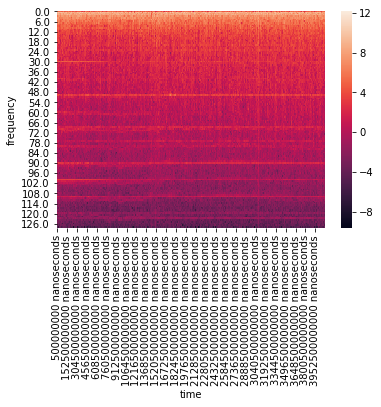

In [108]:
import seaborn as sns

sns.heatmap(np.log(df).transpose())
plt.show

In [91]:
import pandas as pd


df= pd.DataFrame(data=binned_Sxx, columns=binned_time, index=binned_frequencies).transpose()
df = df.apply(np.mean, axis=0)
df = pd.DataFrame({'frequency': df.index.values,
                   'frequency values': df.values,
                   'time': binned_time[0]})
df['time'] = pd.to_timedelta(df['time'], unit='s')
df = df.set_index('time')
df.head()

,frequency,frequency values
time,,
00:00:00.500000,0.0,251.043328
00:00:00.500000,1.0,17799.885247
00:00:00.500000,2.0,3687.714046
00:00:00.500000,3.0,833.157801
00:00:00.500000,4.0,3136.934849


In [95]:
df = df.reset_index().pivot(index='time', columns='frequency', values='frequency values').head()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1 entries, 00:00:00.500000 to 00:00:00.500000
Columns: 129 entries, 0.0 to 128.0
dtypes: float64(129)
memory usage: 1.0 KB


In [97]:
df.head()

frequency,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:00.500000,251.043328,17799.885247,3687.714046,833.157801,3136.934849,629.322718,412.725548,517.767527,157.540117,235.901493,...,0.025006,0.502624,0.15626,0.024617,0.150398,0.059717,0.009226,0.053595,0.007164,0.008266


In [90]:
import pandas as pd
df= pd.DataFrame(data=binned_Sxx, columns=binned_time, index=binned_frequencies).transpose()
df = df.apply(np.mean, axis=0)
df.values

array([2.51043328e+02, 1.77998852e+04, 3.68771405e+03, 8.33157801e+02,
       3.13693485e+03, 6.29322718e+02, 4.12725548e+02, 5.17767527e+02,
       1.57540117e+02, 2.35901493e+02, 6.77348029e+01, 5.61379421e+01,
       4.23569124e+01, 7.31886735e+01, 6.44502890e+01, 5.86463718e+00,
       2.04593428e+01, 1.27973112e+01, 2.32916168e+01, 1.95886888e+01,
       2.77268053e+01, 2.53981100e+01, 3.07795624e+01, 9.90739234e+00,
       1.14269268e+01, 8.93878052e+00, 5.37977171e+00, 1.27553025e+01,
       2.31443188e+01, 9.92135716e+00, 2.09494237e+02, 2.39534466e+01,
       8.75675807e+00, 7.52927161e+00, 1.06032053e+01, 8.80399934e+00,
       7.33750228e+00, 6.45913557e+00, 5.00442751e+00, 1.22057657e+01,
       2.55493617e+01, 9.99180336e+00, 5.52022131e+00, 2.16950921e+00,
       7.52279893e+00, 3.30747422e+00, 3.05383128e+00, 3.69841142e+00,
       2.86677271e+00, 4.25361248e+00, 1.78573892e+01, 4.67779176e+00,
       2.31305745e+00, 5.47714677e+00, 2.67188144e+00, 2.96048374e+00,
      